In [107]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# module to assist with splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [3]:
# Download root contains the root directory for dataset to be downloaded
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

# Path to save the dataset after its been downloaded
HOUSING_PATH = os.path.join("datasets", "housing")

# Appending the specific url to the download root 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
# Creating a fucntion to download the dataset from its site
def fetch_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
        A function to download a dataset and save it into a folder,
        doing this is to emphasize encapsulation.
    """

    if not os.path.isdir(housing_path):
        """Check if there exists the housing_path
            and if it doesn't exist create it.
        """
        os.makedirs(housing_path)

    # Create a path for the dataset to be downloaded
    tgz_path = os.path.join(housing_path, "housing.tgz")

    # Actually download the dataset
    # downloads from housing url on the internet into tgz path on the local machine
    urllib.request.urlretrieve(housing_url, tgz_path)

    # Open and extract the downloaded file
    housing_tgz = tarfile.open(tgz_path)
    # Extract the data into path specified
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
fetch_data()

In [11]:
def load_data(housing_path=HOUSING_PATH):
    """A function to load the data"""

    # Appending housing.csv to the housing path to point to the csv
    path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(path)


In [12]:
housing = load_data()

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Check data summary
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Check the statistical summary of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
# Check the data for missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# Check the categorical distribution of the data
# Since there is only one categorical column
# ocean_proximity is the only categorical
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

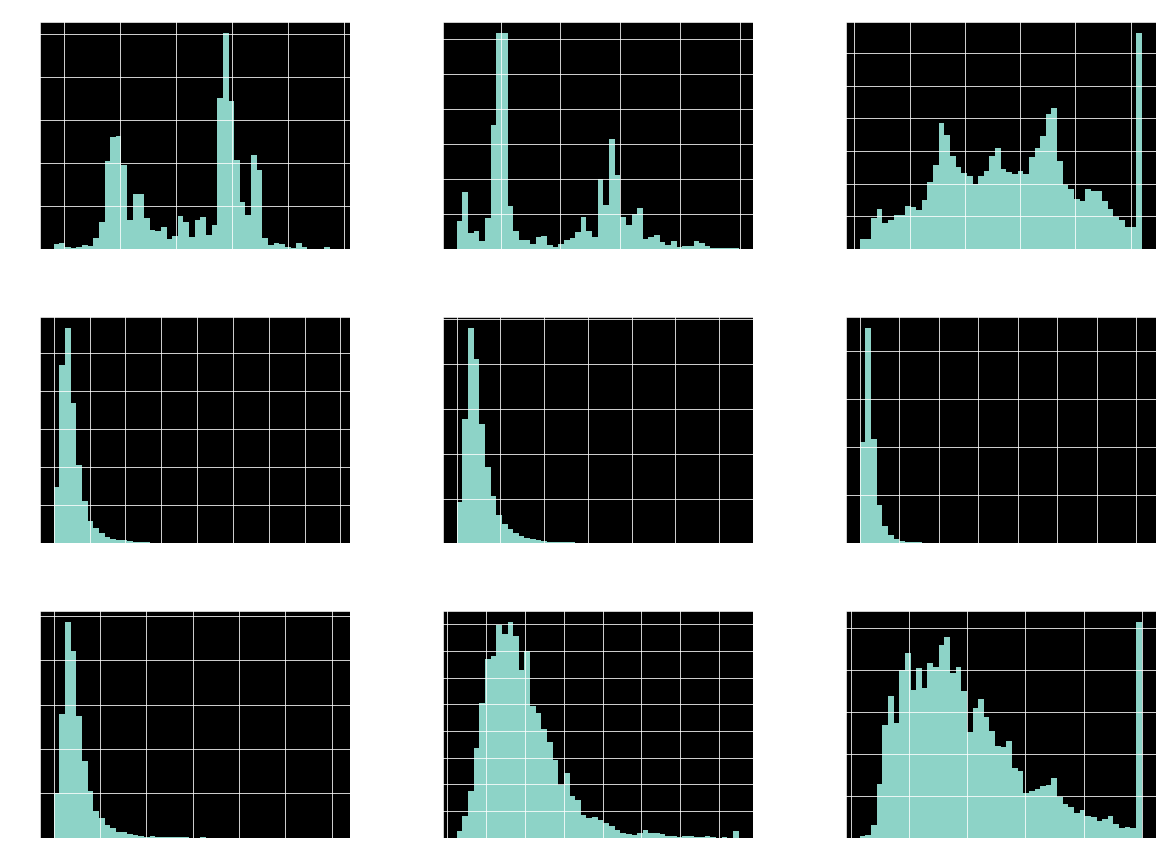

In [18]:
# plot the histogram of the dataset to identify surface patterns
housing.hist(bins=50, figsize=(20, 15))

 Create a Test Set

In [20]:
# Simulating a dataset splitter
def split_train_test(data, test_ratio=0.2):
    """A Function to split a dataset according to a specified ratio"""
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = test_ratio * int(len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[test_indices], data.iloc[train_indices]

In [21]:
# Instead of creating a fake function we can eaisly use 
# Sklearn's train_test_split's module

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
# Categorizing the ocean_proximity into smaller 
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

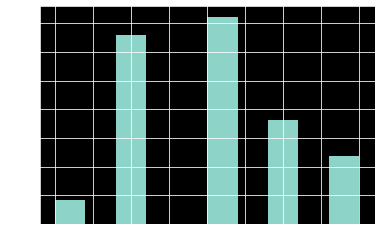

In [24]:
#Plotting a histogram to check the distribution of the income categories
housing["income_cat"].hist()

Performing Stratified Sampling

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# This splits thet dataset wit respect to it's income categories
for train_index, test_index in split.split(housing, housing["income_cat"]):
    s_test_set = housing.loc[test_index]
    s_train_set = housing.loc[train_index]

In [29]:
s_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [30]:
# Remove the income_cat column,
# since it was needed just to perform stratified sampling on the dataset

for set_ in (s_test_set, s_train_set):
    set_.drop("income_cat", axis=1, inplace=True)


Visualising Data to gain insights

In [31]:
# Copy stratified test set into a new variable
strat_housing = s_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

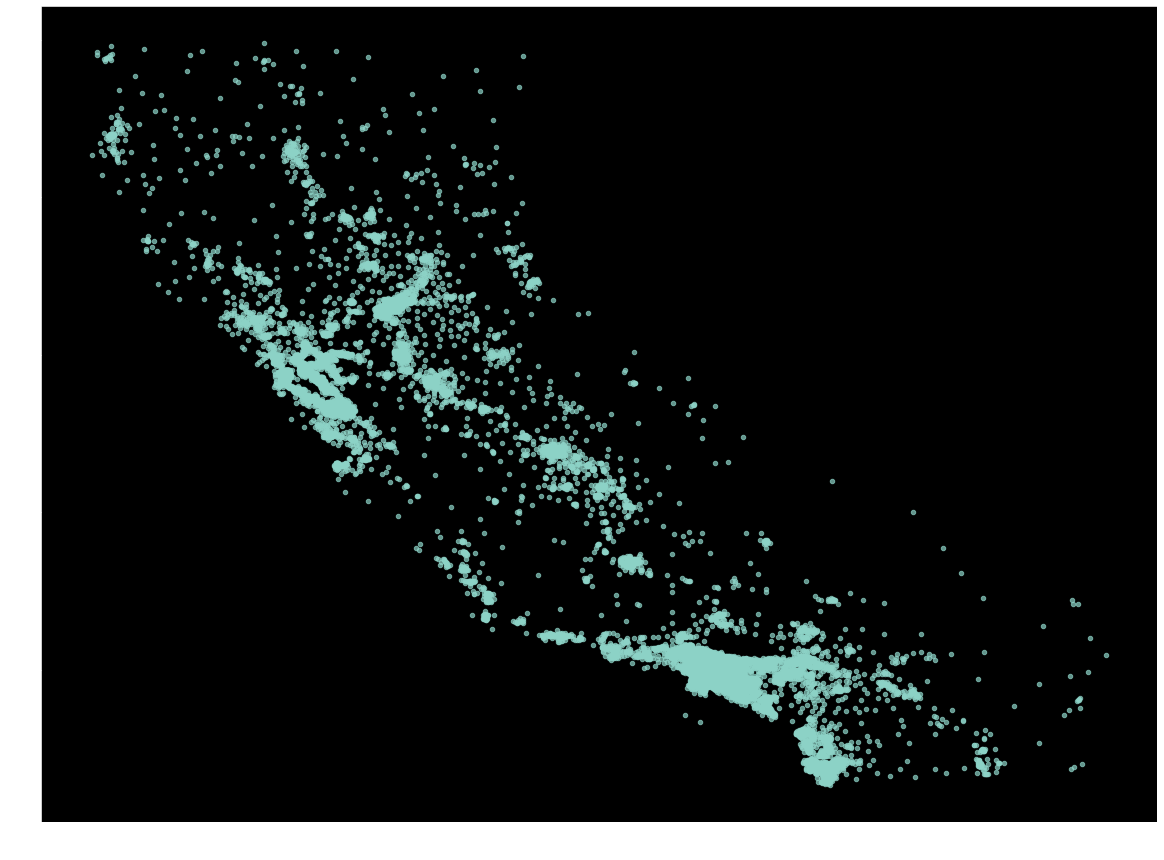

In [35]:
strat_housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(20, 15), alpha=0.7)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

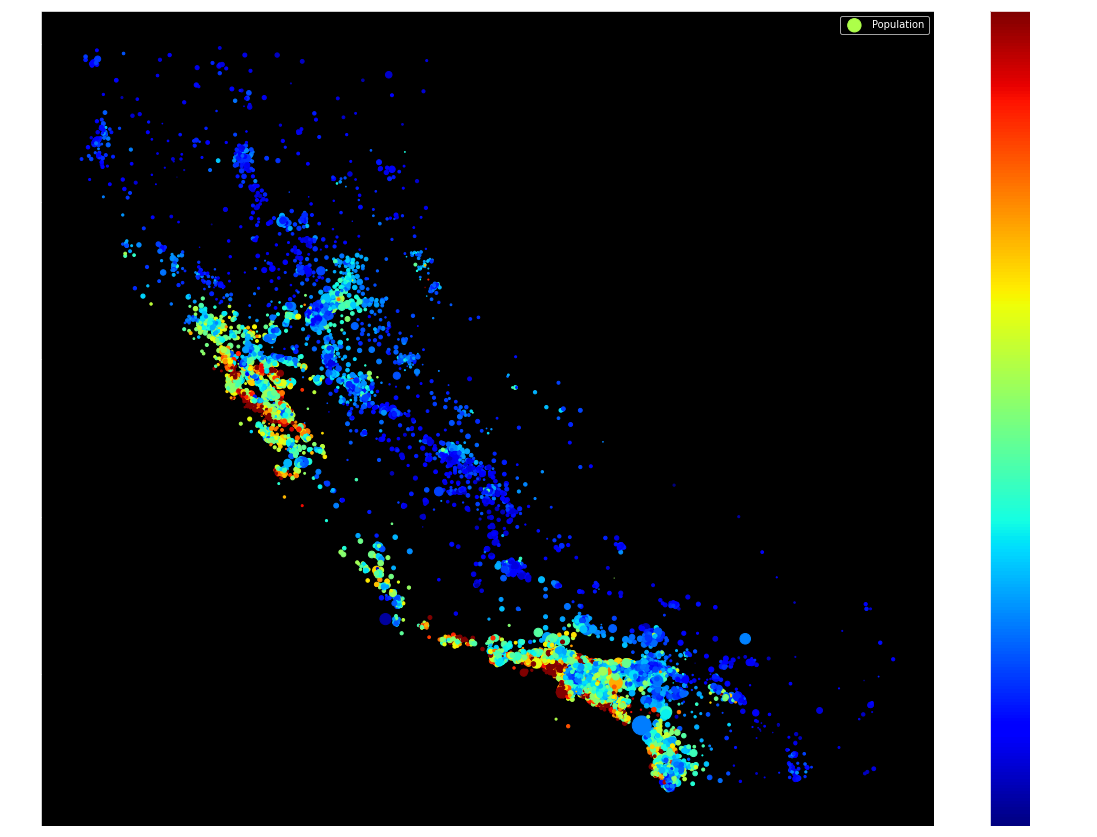

In [36]:
# Taking more of the data features into consideration we create 
# plot that is more insightful

strat_housing.plot(
    kind="scatter", x="longitude", y="latitude",
    s=strat_housing['population'] / 100, label="Population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    figsize=(20, 15)
)

 Checking for correlation

In [37]:
corr_matrix = strat_housing.corr()

In [41]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

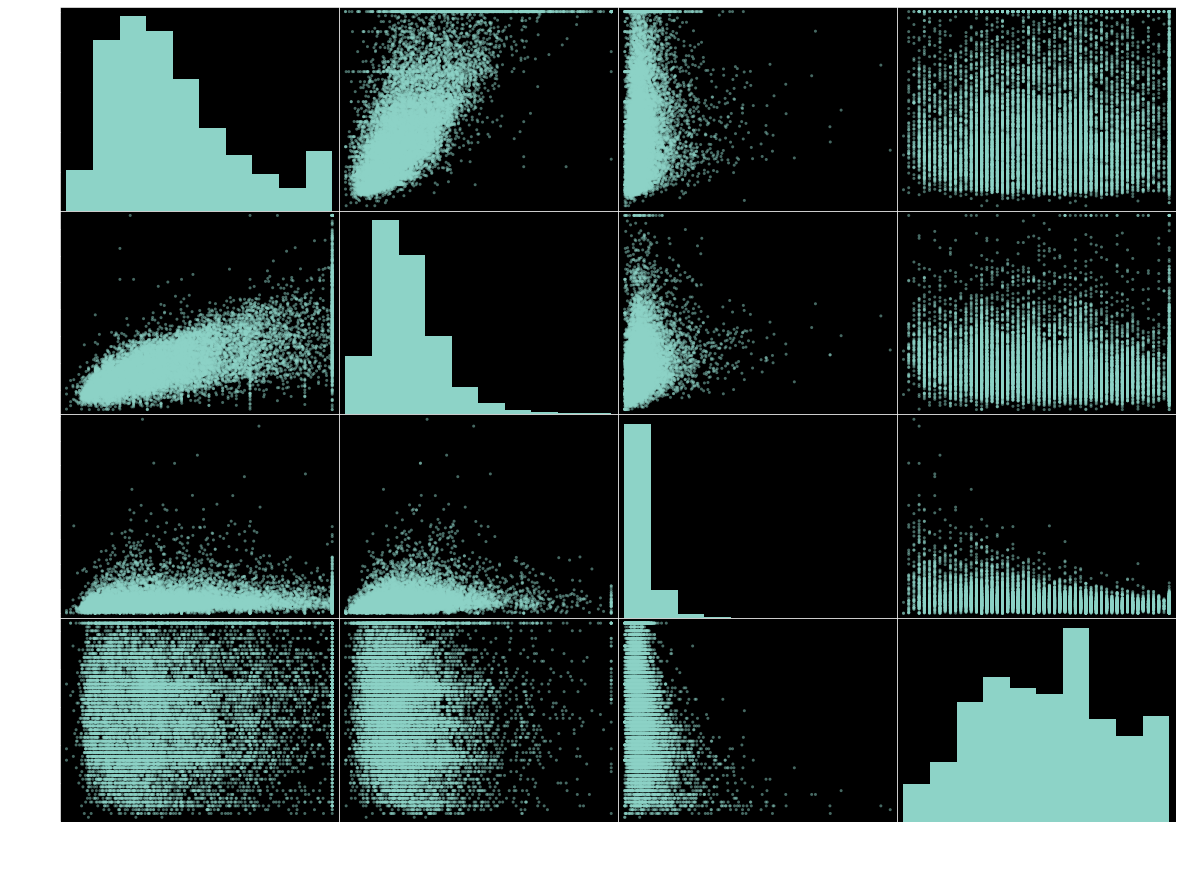

In [43]:
from pandas.plotting import scatter_matrix

# Checking to see what the correlation is between specific attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(strat_housing[attributes], figsize=(20, 15))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

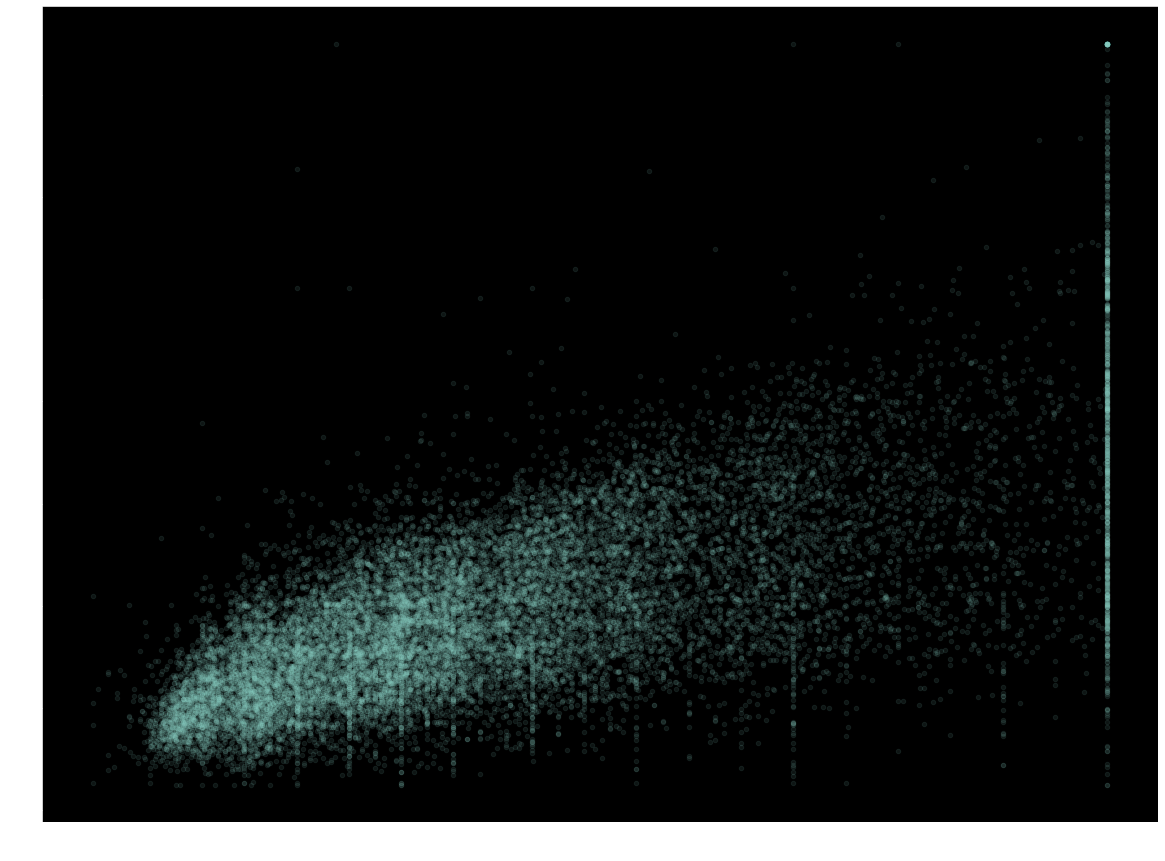

In [46]:
housing.plot(
    kind='scatter', x="median_house_value", y="median_income",
    alpha=0.1, figsize=(20, 15))

**Combine Attributes**

In [48]:
# Since knowing the amount of rooms, bedrooms does not help our analysis
# in this instance we calculate to get respective data per household

strat_housing['rooms_per_household'] = strat_housing['total_rooms'] / strat_housing["households"]
strat_housing['bedrooms_per_room'] = strat_housing['total_bedrooms'] / strat_housing['total_rooms']
strat_housing['population_per_household'] = strat_housing['population'] / strat_housing['households']

In [49]:
strat_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [50]:
# Checking to see new correlations
corr_matrix = strat_housing.corr()


In [51]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Here we can see that there is:
* A slightly postive correlation between the median house value and the number of rooms per household.
   
* Also, a slightly negative correlation between the median house values and the number of bedrooms per room.
   
* Finally, from the new correlation we can see that there is almost not relationship between the population per household and the median house value.

**Preparing Data for ML Algorithms**

In [55]:
# Seperating data into target and test values

housing = s_train_set.drop("median_house_value", axis=1)
# dropping this since this is what we are trying to predict

housing_labels = s_train_set['median_house_value'].copy()

In [57]:
# Checking to see if missing values are present in the dataset
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

**Data Cleaning**

In [59]:
# Clean our data using sklearn's Imputer function
imputer = SimpleImputer(strategy="median")

# Removing the ocean proxomity column from the dataset
housing_num = housing.drop("ocean_proximity", axis=1)



In [61]:
X = imputer.fit_transform(housing_num)

In [62]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [65]:
# All missing values have been replaced by their columns median value
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [66]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


**Handling Text and Categorical Attributes**

Since models accept numerical data, all text and categorical data has to be transformed into numerical data

In [67]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [69]:
# One hot encoder is used to avoid and prevent a false sense of proximity
# between transformed data

oneHot = OneHotEncoder()

housing_cat_1hot = oneHot.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Custom Transformers**

In [83]:
# index of the columns needed
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """This is a class to include the combined attributes into our dataset"""

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

**Transformation Pipelines**

In [84]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

**Building a Pipeline to handle both numerical and categorical attributes**

In [86]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [87]:
housing_prepared = full_pipeline.fit_transform(housing)

In [89]:
housing_prepared.std()

0.8637671850678282

**Select and Train Model**

In [92]:
linear_reg = LinearRegression()

linear_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [96]:
# Selecting some of our data to carry out testing on
some_data = housing.iloc[:20]
some_label = housing_labels.iloc[:20]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", linear_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879 154295.07624519 426711.9315643  228002.94602374
 139801.43738593  30128.00152011 118169.92762422  87365.82163318
 320675.82421293 127808.84524184 125545.49305265 204198.01305268
 280418.17561017 105783.91427663 149515.13685054 209983.96728476]


In [97]:
print("Labels: ", some_label)

Labels:  17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
Name: median_house_value, dtype: float64


In [101]:
# Actual Predictions with rmse

housing_predictions = linear_reg.predict(housing_prepared)
lin_mse = mse(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# Root mean square error  is large to model doesn't predict the values correctly

68628.19819848923

In [106]:
decision = DecisionTreeRegressor()
decision.fit(housing_prepared, housing_labels)

housingPredictions = decision.predict(housing_prepared)
tree_mse = mse(housing_labels, housingPredictions)
tree_rmse = np.sqrt(tree_mse)

tree_mse

# This has no error ==  Overfitting

0.0

**Better Evaluation Using Cross-Validation**

In [109]:
# Dividing the dataset into folds 
# Then the model is tested on each of the folds to check how well it performs

scores = cross_val_score(decision, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)


array([68210.94558334, 68287.88047775, 69886.27583183, 68568.99246981,
       71704.71848732, 77169.7409868 , 70764.76740094, 71220.23899115,
       76561.81027861, 69957.91625802])

In [110]:
tree_rmse_scores

array([68210.94558334, 68287.88047775, 69886.27583183, 68568.99246981,
       71704.71848732, 77169.7409868 , 70764.76740094, 71220.23899115,
       76561.81027861, 69957.91625802])

In [111]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [112]:
display_scores(tree_rmse_scores)

Scores:  [68210.94558334 68287.88047775 69886.27583183 68568.99246981
 71704.71848732 77169.7409868  70764.76740094 71220.23899115
 76561.81027861 69957.91625802]
Mean:  71233.3286765576
Standard Deviation:  3040.1647478996124


In [115]:
# Checking for linear regression
lin_scores = cross_val_score(linear_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798348
